### Intialization

In [1]:
import os
import sys

import pandas as pd
#pd.set_option('display.max_colwidth', None) # Wrap text in cells to show all of large fields
#pd.options.display.float_format = '{:.3f}'.format # 3 decimal places
import numpy as np
#import plotly_express as px
#import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

os.getcwd() #listdir(), mkdir(), chdir()
#pd.show_versions(as_json=False)

'/Users/chris/GitHub/chrishuson.github.io/templates'

### Graph list

1. Function curve
2. Univariate data
    1. Dot plot
    1. Categorical, bar chart
    2. Discrete: summary statistics, bar chart and box plot
    3. Continuous: histogram
    4. Frequency table, statistics and charts
4. Bivariate data
    1. 2-way frequency table
    2. Scatterplot (with regression line)

### data sources

1. Code cell
    1. data list
    2. Function-generated values
2. Data file import (Excel and/or csv)
3. Internet data sources

### Data sourced from list

In [66]:
import math, random

data = [1,2,2,3,4,4,4,5,5,6,7]
data1 = [x+3 for x in data]
data2 = [1.5 * x for x in data]

data_random = [random.randint(1,20) for x in range(20)]
#data_normal = math.normal(5, 2, 100) -- doesn't work

df = pd.DataFrame({"a": [1, 2, 3], "b": [4, 5, 6]})
df2 = pd.DataFrame([(4,10), (6, 3), (10,15), (14,19), (16, 7), (19, 7)], columns=['xcol', 'ycol'])

In [24]:
df2

,xcol,ycol
0,4,10
1,6,3
2,10,15
3,14,19
4,16,7
5,19,7


## Univariate Data

### Line graphs

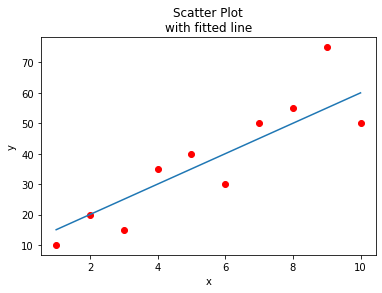

In [85]:
x = range(1, 11)
y = [10, 20, 15, 35, 40, 30, 50, 55, 75, 50]

b = 10
m = 5
z = [m*x+b for x in x]

plt.plot(x, y, 'ro')
plt.plot(x, z)
    #format string: color, marker, linestyle
    #colors: rbgkmcyw ; marker: xo+.^vs*<>d, line: -, —, -., :
plt.title('Scatter Plot\nwith fitted line')
plt.xlabel('x values')
plt.ylabel('y values')
plt.show();

### Dot plots

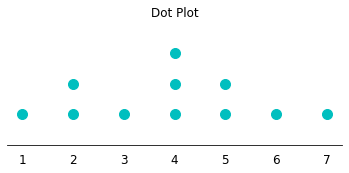

Set of values:  [1, 2, 2, 3, 4, 4, 4, 5, 5, 6, 7]


In [127]:
data = [1,2,2,3,4,4,4,5,5,6,7]
values, counts = np.unique(data, return_counts=True)

fig, ax = plt.subplots(figsize=(6, 2.25))
for value, count in zip(values, counts):
    ax.plot([value]*count, list(range(count)), 'co', ms=10, linestyle='')
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)
ax.yaxis.set_visible(False)
#plt.ylabel('Frequency')
ax.set_ylim(-1, max(counts))
ax.set_xticks(range(min(values), max(values)+1))
ax.tick_params(axis='x', length=0, pad=8, labelsize=12)

plt.title('Dot Plot')
plt.show()
print('Set of values: ', data)

[StackOverflow dot plot source](https://stackoverflow.com/questions/49703938/how-to-create-a-dot-plot-in-matplotlib-not-a-scatter-plot)

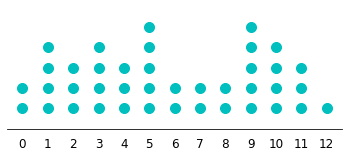

In [129]:
# Create random data
rng = np.random.default_rng(125) # random number generator
data = rng.integers(0, 13, size=40)
values, counts = np.unique(data, return_counts=True)

# Draw dot plot with appropriate figure size, marker size and y-axis limits
fig, ax = plt.subplots(figsize=(6, 2.25))
for value, count in zip(values, counts):
    ax.plot([value]*count, list(range(count)), 'co', ms=10, linestyle='')
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)
ax.yaxis.set_visible(False)
ax.set_ylim(-1, max(counts))
ax.set_xticks(range(min(values), max(values)+1))
ax.tick_params(axis='x', length=0, pad=8, labelsize=12)

plt.show()

### Box plots

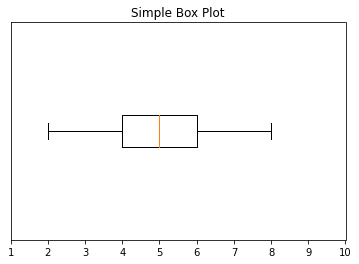

In [170]:
plt.boxplot([2,4,5,6,8], vert=False)
plt.xlim([1, 10])
#plt.ylabel('Category')
plt.yticks([]) # remove y-axis ticks
plt.title('Simple Box Plot');

### Report card grades

In [ ]:
marks = pd.read_excel('../PreCalc2023/07-Bivariate-data/marks-data.xlsx')
display(marks.head())


In [ ]:
data = marks[(marks['Course']=='Geometry') & (marks['Term']==2) & (marks['Section']==2)][['Mark']]

data.describe().T

In [163]:

values, counts = np.unique(data, return_counts=True)
data_frequency = pd.DataFrame({'Grade': values, 'Frequency': counts})
data_frequency.T.style.hide(axis=1)


Grade,70,75,80,85,90,91,96,97
Frequency,7,7,3,1,2,5,1,3


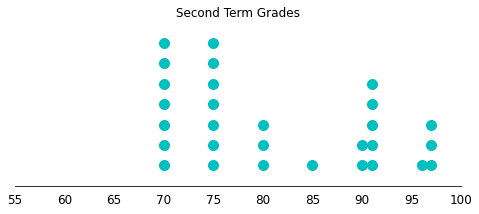

In [164]:

fig, ax = plt.subplots(figsize=(8, 3))
for value, count in zip(values, counts):
    ax.plot([value]*count, list(range(count)), 'co', ms=10, linestyle='')
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)
ax.yaxis.set_visible(False)
#plt.ylabel('Frequency')
ax.set_ylim(-1, max(counts))
ax.set_xticks([55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
#ax.set_xticks(range(min(values), max(values)+1))
ax.tick_params(axis='x', length=0, pad=8, labelsize=12)

plt.title('Second Term Grades')
plt.show()

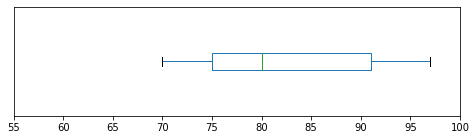

In [172]:
data.boxplot(column='Mark', vert=False, figsize=(8, 2), grid=False)
plt.xlim([55, 100])
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)
plt.yticks([]);

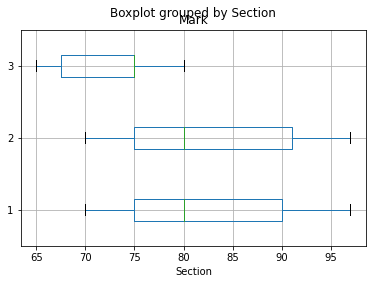

In [138]:

marks[(marks['Course']=='Geometry') & (marks['Term']==2)].boxplot(column='Mark', by='Section', vert=False)
ax.set(ylabel="Count");


### Bar charts

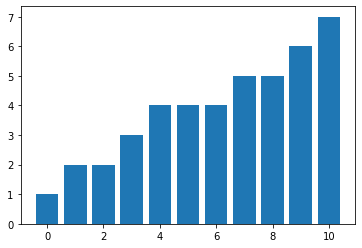

In [26]:
plt.bar(range(len(data)),data)
plt.show()

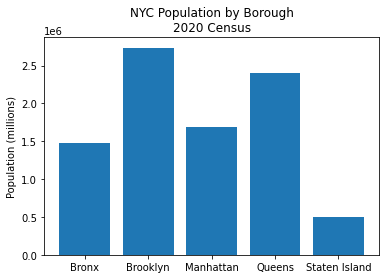

In [57]:
nyc_boroughs = pd.DataFrame([('Bronx', 1472654),('Brooklyn', 2736074),('Manhattan', 1694251),('Queens', 2405464),('Staten Island', 495747)]) #2020 census
nyc_boroughs.columns = ['Borough', 'Population']

plt.bar(nyc_boroughs['Borough'],nyc_boroughs['Population'])
#plt.xlabel('Borough')
plt.ylabel('Population (millions)')
plt.title('NYC Population by Borough\n2020 Census')
#plt.suptitle('2020 Census')
plt.show();

In [56]:
display(nyc_boroughs)
print('Total NYC Population: ', nyc_boroughs['Population'].sum())

,Borough,Population
0,Bronx,1472654
1,Brooklyn,2736074
2,Manhattan,1694251
3,Queens,2405464
4,Staten Island,495747


Total NYC Population:  8804190
